In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/05_May.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,35.000000,1,2,1,2580.0,2455.0,2410.0,2742.0,2967.0,2780.0,2503.083333,2542.0
1,24.833333,35.583333,1,2,1,2569.0,2491.0,2394.0,2722.0,2956.0,2770.0,2514.666667,2533.0
2,24.666667,36.166667,1,2,1,2570.0,2459.0,2433.0,2722.0,2945.0,2775.0,2523.416667,2538.0
3,24.500000,36.750000,1,2,1,2576.0,2534.0,2434.0,2733.0,2922.0,2790.0,2527.916667,2488.0
4,24.333333,37.333333,2,2,1,2542.0,2580.0,2455.0,2713.0,2896.0,2789.0,2533.833333,2526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,34.192450,30.085943,23,6,1,3951.0,3911.0,3809.0,3959.0,3932.0,3833.0,3927.416667,3961.0
8924,34.192450,30.085943,24,6,1,3945.0,3938.0,3858.0,3970.0,3903.0,3766.0,3935.750000,3958.0
8925,34.192450,30.085943,24,6,1,3968.0,3940.0,3849.0,3955.0,3851.0,3754.0,3939.750000,3897.0
8926,33.190000,30.085943,24,6,1,3972.0,3935.0,3901.0,3896.0,3741.0,3683.0,3941.416667,3921.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.063201,-1.539995,-0.402733,-1.660699,-0.988326,0.636625,-0.937881,-1.346869,-1.492156,-0.375191,0.393355,-0.215285,-1.288220
1,-1.092778,-1.576356,-0.355029,-1.660699,-0.988326,0.636625,-0.974023,-1.228629,-1.544679,-0.441050,0.356901,-0.248796,-1.247017
2,-1.076346,-1.612718,-0.307325,-1.660699,-0.988326,0.636625,-0.970738,-1.333731,-1.416653,-0.441050,0.320447,-0.232040,-1.215893
3,-1.240664,-1.649080,-0.259621,-1.660699,-0.988326,0.636625,-0.951023,-1.087399,-1.413371,-0.404828,0.244225,-0.181774,-1.199886
4,-1.115782,-1.685442,-0.211917,-1.516262,-0.988326,0.636625,-1.062737,-0.936316,-1.344434,-0.470687,0.158062,-0.185125,-1.178840


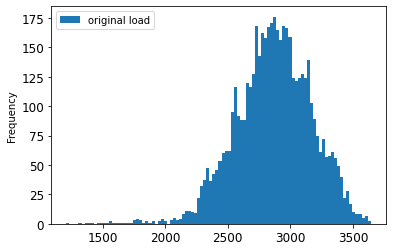

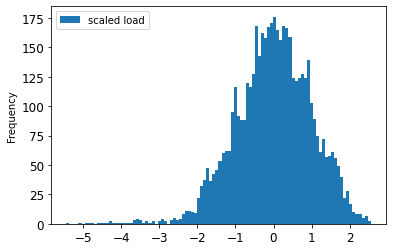

In [8]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

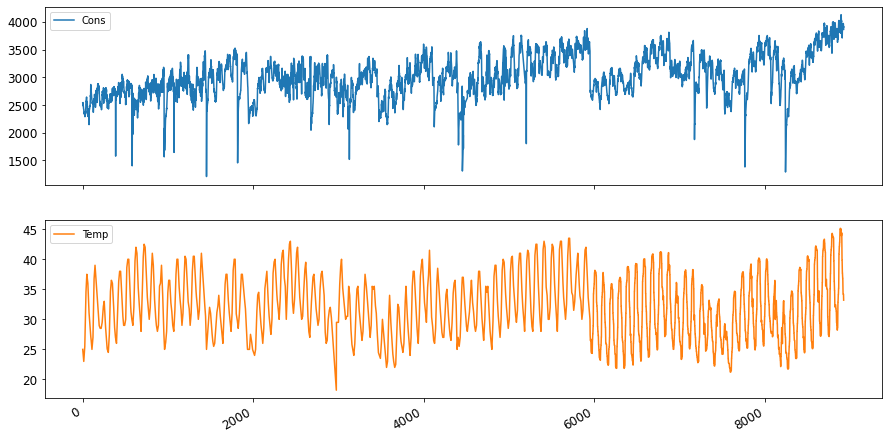

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-1.063201,-1.539995,-0.402733,-1.660699,-0.988326,0.636625,-0.937881,-1.346869,-1.492156,-0.375191,0.393355,-0.215285,-1.288220,-1.092778
1,-1.092778,-1.576356,-0.355029,-1.660699,-0.988326,0.636625,-0.974023,-1.228629,-1.544679,-0.441050,0.356901,-0.248796,-1.247017,-1.076346
2,-1.076346,-1.612718,-0.307325,-1.660699,-0.988326,0.636625,-0.970738,-1.333731,-1.416653,-0.441050,0.320447,-0.232040,-1.215893,-1.240664
3,-1.240664,-1.649080,-0.259621,-1.660699,-0.988326,0.636625,-0.951023,-1.087399,-1.413371,-0.404828,0.244225,-0.181774,-1.199886,-1.115782
4,-1.115782,-1.685442,-0.211917,-1.516262,-0.988326,0.636625,-1.062737,-0.936316,-1.344434,-0.470687,0.158062,-0.185125,-1.178840,-1.181510
5,-1.181510,-1.721804,-0.164213,-1.516262,-0.988326,0.636625,-1.092308,-0.972444,-1.226257,-0.589234,0.095096,-0.389541,-1.174393,-1.217659
6,-1.217659,-1.758166,-0.116509,-1.516262,-0.988326,0.636625,-1.075880,-0.969160,-1.331303,-0.599113,0.078526,-0.356030,-1.163722,-1.227519
7,-1.227519,-1.794528,-0.068805,-1.516262,-0.988326,0.636625,-1.240164,-0.949453,-1.085100,-0.776933,0.055328,-0.433105,-1.176172,-1.303105
8,-1.303105,-1.830890,-0.021101,-1.371824,-0.988326,0.636625,-1.115308,-1.061124,-0.934096,-0.799984,-0.097116,-0.476670,-1.209075,-1.358973
9,-1.358973,-1.867252,0.026603,-1.371824,-0.988326,0.636625,-1.181022,-1.090684,-0.970206,-0.888894,-0.166710,-0.630819,-1.243756,-1.437845


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,0.892182,-0.459052,-0.767018,1.372490,-0.988326,0.636625,0.839680,0.584372,0.359289,0.329504,0.499403,0.468336,0.706114,0.875750
4984,0.875750,-0.498720,-0.670371,1.516927,-0.988326,0.636625,0.780538,0.692758,0.227981,0.313039,0.459635,0.485092,0.764806,0.783732
4985,0.783732,-0.538388,-0.573724,1.516927,-0.988326,0.636625,0.852823,0.758446,0.126217,0.276816,0.383413,0.404666,0.824387,0.704859
4986,0.704859,-0.578055,-0.477077,1.516927,-0.988326,0.636625,0.895537,0.791291,0.388834,0.210957,0.307191,0.227058,0.853140,0.665423
4987,0.665423,-0.617723,-0.380430,1.516927,-0.988326,0.636625,0.892251,0.840557,0.585796,0.217543,0.297249,0.270622,0.860551,0.566832
4988,0.566832,-0.657390,-0.283783,1.661365,-0.988326,0.636625,0.875823,0.781437,0.694125,0.145098,0.313819,0.284027,0.849287,0.422233
4989,0.422233,-0.697058,-0.187136,1.661365,-0.988326,0.636625,0.783823,0.853695,0.759779,0.141805,0.201143,0.126526,0.819052,0.372937
4990,0.372937,-0.736726,-0.090489,1.661365,-0.988326,0.636625,0.704967,0.896392,0.792606,0.062773,0.101724,0.009238,0.781406,0.343360
4991,0.343360,-0.776393,0.006158,1.661365,-0.988326,0.636625,0.665538,0.893108,0.841847,-0.075531,0.065270,-0.017571,0.736646,0.267774
4992,0.267774,-0.776393,0.006158,-1.660699,-0.479435,0.636625,0.566968,0.876686,0.782758,-0.078824,0.008932,-0.262200,0.690404,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,0.892182,-0.459052,-0.767018,1.372490,-0.988326,0.636625,0.839680,0.584372,0.359289,0.329504,0.499403,0.468336,0.706114,0.875750
4984,0.875750,-0.498720,-0.670371,1.516927,-0.988326,0.636625,0.780538,0.692758,0.227981,0.313039,0.459635,0.485092,0.764806,0.783732
4985,0.783732,-0.538388,-0.573724,1.516927,-0.988326,0.636625,0.852823,0.758446,0.126217,0.276816,0.383413,0.404666,0.824387,0.704859
4986,0.704859,-0.578055,-0.477077,1.516927,-0.988326,0.636625,0.895537,0.791291,0.388834,0.210957,0.307191,0.227058,0.853140,0.665423
4987,0.665423,-0.617723,-0.380430,1.516927,-0.988326,0.636625,0.892251,0.840557,0.585796,0.217543,0.297249,0.270622,0.860551,0.566832
4988,0.566832,-0.657390,-0.283783,1.661365,-0.988326,0.636625,0.875823,0.781437,0.694125,0.145098,0.313819,0.284027,0.849287,0.422233
4989,0.422233,-0.697058,-0.187136,1.661365,-0.988326,0.636625,0.783823,0.853695,0.759779,0.141805,0.201143,0.126526,0.819052,0.372937
4990,0.372937,-0.736726,-0.090489,1.661365,-0.988326,0.636625,0.704967,0.896392,0.792606,0.062773,0.101724,0.009238,0.781406,0.343360
4991,0.343360,-0.776393,0.006158,1.661365,-0.988326,0.636625,0.665538,0.893108,0.841847,-0.075531,0.065270,-0.017571,0.736646,0.267774
4992,0.267774,-0.776393,0.006158,-1.660699,-0.479435,0.636625,0.566968,0.876686,0.782758,-0.078824,0.008932,-0.262200,0.690404,0.267774


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-1.092778
1,-1.076346
2,-1.240664
3,-1.115782
4,-1.181510
...,...
4988,0.422233
4989,0.372937
4990,0.343360
4991,0.267774


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.063201,-1.539995,-0.402733,-1.660699,-0.988326,0.636625,-0.937881,-1.346869,-1.492156,-0.375191,0.393355,-0.215285,-1.288220
1,-1.092778,-1.576356,-0.355029,-1.660699,-0.988326,0.636625,-0.974023,-1.228629,-1.544679,-0.441050,0.356901,-0.248796,-1.247017
2,-1.076346,-1.612718,-0.307325,-1.660699,-0.988326,0.636625,-0.970738,-1.333731,-1.416653,-0.441050,0.320447,-0.232040,-1.215893
3,-1.240664,-1.649080,-0.259621,-1.660699,-0.988326,0.636625,-0.951023,-1.087399,-1.413371,-0.404828,0.244225,-0.181774,-1.199886
4,-1.115782,-1.685442,-0.211917,-1.516262,-0.988326,0.636625,-1.062737,-0.936316,-1.344434,-0.470687,0.158062,-0.185125,-1.178840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,0.566832,-0.657390,-0.283783,1.661365,-0.988326,0.636625,0.875823,0.781437,0.694125,0.145098,0.313819,0.284027,0.849287
4989,0.422233,-0.697058,-0.187136,1.661365,-0.988326,0.636625,0.783823,0.853695,0.759779,0.141805,0.201143,0.126526,0.819052
4990,0.372937,-0.736726,-0.090489,1.661365,-0.988326,0.636625,0.704967,0.896392,0.792606,0.062773,0.101724,0.009238,0.781406
4991,0.343360,-0.776393,0.006158,1.661365,-0.988326,0.636625,0.665538,0.893108,0.841847,-0.075531,0.065270,-0.017571,0.736646


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4993, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,2913.0,28.625000,39.250000,1.0,3.0,1.0,2994.0,3104.0,3125.0,2790.0,2820.0,2771.0,3041.666667
4994,2900.0,28.750000,38.500000,1.0,3.0,1.0,2979.0,3080.0,3138.0,2787.0,2771.0,2756.0,3021.833333
4995,2863.0,28.875000,37.750000,1.0,3.0,1.0,2970.0,3068.0,3137.0,2759.0,2745.0,2731.0,2999.000000
4996,2853.0,29.000000,37.000000,2.0,3.0,1.0,2947.0,3038.0,3132.0,2726.0,2725.0,2683.0,2975.750000
4997,2832.0,29.125000,36.250000,2.0,3.0,1.0,2913.0,2994.0,3104.0,2692.0,2728.0,2686.0,2953.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,3541.0,30.521739,64.478261,24.0,5.0,1.0,3632.0,3626.0,3589.0,3507.0,3295.0,3400.0,3610.500000
5949,3500.0,30.347826,65.652174,24.0,5.0,1.0,3642.0,3620.0,3599.0,3490.0,3273.0,3383.0,3602.250000
5950,3488.0,30.173913,66.826087,24.0,5.0,1.0,3618.0,3607.0,3605.0,3476.0,3285.0,3397.0,3592.500000
5951,3481.0,30.000000,68.000000,24.0,5.0,1.0,3594.0,3614.0,3628.0,3446.0,3251.0,3363.0,3580.250000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.817566,-1.583829,1.019036,-1.661325,-0.578052,0.654654,-1.469143,-1.008308,-0.915466,-2.034386,-1.624484,-1.573833,-1.384851
4994,-1.871138,-1.556013,0.952439,-1.661325,-0.578052,0.654654,-1.530715,-1.106824,-0.862026,-2.046237,-1.808911,-1.627635,-1.473620
4995,-2.023610,-1.528197,0.885842,-1.661325,-0.578052,0.654654,-1.567659,-1.156083,-0.866137,-2.156846,-1.906770,-1.717307,-1.575816
4996,-2.064819,-1.500381,0.819245,-1.516862,-0.578052,0.654654,-1.662070,-1.279228,-0.886691,-2.287206,-1.982047,-1.889475,-1.679877
4997,-2.151357,-1.472565,0.752648,-1.516862,-0.578052,0.654654,-1.801635,-1.459842,-1.001790,-2.421517,-1.970755,-1.878715,-1.781327
4998,-2.171962,-1.444750,0.686052,-1.516862,-0.578052,0.654654,-1.854998,-1.521415,-1.100447,-2.445218,-2.004630,-1.932518,-1.875690
4999,-2.283225,-1.416934,0.619455,-1.516862,-0.578052,0.654654,-2.006877,-1.558358,-1.149776,-2.413616,-2.125072,-1.968386,-1.975648
5000,-2.340917,-1.389118,0.552858,-1.372399,-0.578052,0.654654,-2.047926,-1.652770,-1.273097,-2.405715,-2.166474,-2.007841,-2.069639
5001,-2.320313,-1.361302,0.486261,-1.372399,-0.578052,0.654654,-2.134127,-1.792335,-1.453968,-2.318809,-2.185293,-1.997081,-2.145353
5002,-2.246137,-1.333486,0.419664,-1.372399,-0.578052,0.654654,-2.154651,-1.845698,-1.515629,-2.251653,-2.117544,-1.975560,-2.208760


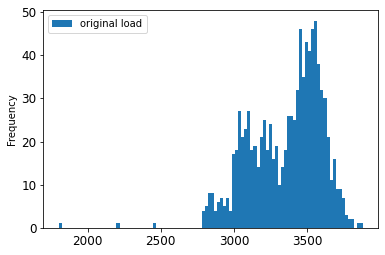

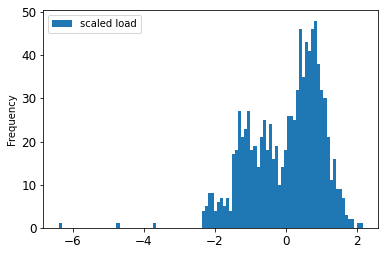

In [19]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5952)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5952)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-1.817566,-1.583829,1.019036,-1.661325,-0.578052,0.654654,-1.469143,-1.008308,-0.915466,-2.034386,-1.624484,-1.573833,-1.384851,-1.871138
4994,-1.871138,-1.556013,0.952439,-1.661325,-0.578052,0.654654,-1.530715,-1.106824,-0.862026,-2.046237,-1.808911,-1.627635,-1.473620,-2.023610
4995,-2.023610,-1.528197,0.885842,-1.661325,-0.578052,0.654654,-1.567659,-1.156083,-0.866137,-2.156846,-1.906770,-1.717307,-1.575816,-2.064819
4996,-2.064819,-1.500381,0.819245,-1.516862,-0.578052,0.654654,-1.662070,-1.279228,-0.886691,-2.287206,-1.982047,-1.889475,-1.679877,-2.151357
4997,-2.151357,-1.472565,0.752648,-1.516862,-0.578052,0.654654,-1.801635,-1.459842,-1.001790,-2.421517,-1.970755,-1.878715,-1.781327,-2.171962
4998,-2.171962,-1.444750,0.686052,-1.516862,-0.578052,0.654654,-1.854998,-1.521415,-1.100447,-2.445218,-2.004630,-1.932518,-1.875690,-2.283225
4999,-2.283225,-1.416934,0.619455,-1.516862,-0.578052,0.654654,-2.006877,-1.558358,-1.149776,-2.413616,-2.125072,-1.968386,-1.975648,-2.340917
5000,-2.340917,-1.389118,0.552858,-1.372399,-0.578052,0.654654,-2.047926,-1.652770,-1.273097,-2.405715,-2.166474,-2.007841,-2.069639,-2.320313
5001,-2.320313,-1.361302,0.486261,-1.372399,-0.578052,0.654654,-2.134127,-1.792335,-1.453968,-2.318809,-2.185293,-1.997081,-2.145353,-2.246137
5002,-2.246137,-1.333486,0.419664,-1.372399,-0.578052,0.654654,-2.154651,-1.845698,-1.515629,-2.251653,-2.117544,-1.975560,-2.208760,-2.159599


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5943,1.071168,-0.968253,2.738009,1.372399,0.576849,0.654654,1.133328,0.810142,0.650714,1.038954,0.490785,0.987177,0.974981,1.145344
5944,1.145344,-1.006953,2.842247,1.516862,0.576849,0.654654,1.125118,0.982546,0.580832,1.031053,0.438091,0.965656,1.028317,1.186553
5945,1.186553,-1.045653,2.946486,1.516862,0.576849,0.654654,1.100489,1.023594,0.305415,0.948097,0.411745,0.926201,1.110373,1.087652
5946,1.087652,-1.084353,3.050725,1.516862,0.576849,0.654654,1.047126,1.048223,0.547947,0.896743,0.325177,0.861638,1.161471,0.988751
5947,0.988751,-1.123054,3.154963,1.516862,0.576849,0.654654,1.075860,1.142635,0.819254,0.853289,0.298830,0.750445,1.179000,0.770344
5948,0.770344,-1.161754,3.259202,1.661325,0.576849,0.654654,1.149747,1.134425,0.991903,0.797985,0.163332,0.682295,1.161098,0.601388
5949,0.601388,-1.200454,3.363441,1.661325,0.576849,0.654654,1.190796,1.109796,1.033010,0.730830,0.080528,0.621319,1.124173,0.551938
5950,0.551938,-1.239154,3.467679,1.661325,0.576849,0.654654,1.092280,1.056433,1.057675,0.675525,0.125694,0.671535,1.080534,0.523092
5951,0.523092,-1.277855,3.571918,1.661325,0.576849,0.654654,0.993763,1.085167,1.152221,0.557016,-0.002276,0.549582,1.025706,-2.085423
5952,-2.085423,-1.860329,0.764461,-1.661325,-0.000602,0.654654,-1.871417,-1.780020,-1.458079,-1.670958,-1.729871,-1.150585,-1.978632,-2.085423


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4993,-1.871138
4994,-2.023610
4995,-2.064819
4996,-2.151357
4997,-2.171962
...,...
5948,0.601388
5949,0.551938
5950,0.523092
5951,-2.085423


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-1.817566,-1.583829,1.019036,-1.661325,-0.578052,0.654654,-1.469143,-1.008308,-0.915466,-2.034386,-1.624484,-1.573833,-1.384851
4994,-1.871138,-1.556013,0.952439,-1.661325,-0.578052,0.654654,-1.530715,-1.106824,-0.862026,-2.046237,-1.808911,-1.627635,-1.473620
4995,-2.023610,-1.528197,0.885842,-1.661325,-0.578052,0.654654,-1.567659,-1.156083,-0.866137,-2.156846,-1.906770,-1.717307,-1.575816
4996,-2.064819,-1.500381,0.819245,-1.516862,-0.578052,0.654654,-1.662070,-1.279228,-0.886691,-2.287206,-1.982047,-1.889475,-1.679877
4997,-2.151357,-1.472565,0.752648,-1.516862,-0.578052,0.654654,-1.801635,-1.459842,-1.001790,-2.421517,-1.970755,-1.878715,-1.781327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,0.770344,-1.161754,3.259202,1.661325,0.576849,0.654654,1.149747,1.134425,0.991903,0.797985,0.163332,0.682295,1.161098
5949,0.601388,-1.200454,3.363441,1.661325,0.576849,0.654654,1.190796,1.109796,1.033010,0.730830,0.080528,0.621319,1.124173
5950,0.551938,-1.239154,3.467679,1.661325,0.576849,0.654654,1.092280,1.056433,1.057675,0.675525,0.125694,0.671535,1.080534
5951,0.523092,-1.277855,3.571918,1.661325,0.576849,0.654654,0.993763,1.085167,1.152221,0.557016,-0.002276,0.549582,1.025706


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(960, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
417/417 [==============================] - 5s 12ms/step - loss: 0.3298 - val_loss: 0.2872
Epoch 2/300
417/417 [==============================] - 5s 11ms/step - loss: 0.2058 - val_loss: 0.1480
Epoch 3/300
417/417 [==============================] - 5s 11ms/step - loss: 0.1735 - val_loss: 0.1580
Epoch 4/300
417/417 [==============================] - 5s 11ms/step - loss: 0.1619 - val_loss: 0.1711
Epoch 5/300
417/417 [==============================] - 5s 11ms/step - loss: 0.1243 - val_loss: 0.1149
Epoch 6/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1222 - val_loss: 0.1231
Epoch 7/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1250 - val_loss: 0.0936
Epoch 8/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1160 - val_loss: 0.1087
Epoch 9/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1115 - val_loss: 0.1004
Epoch 10/300
417/417 [==============================] - 5s 11ms/step - loss: 0.119

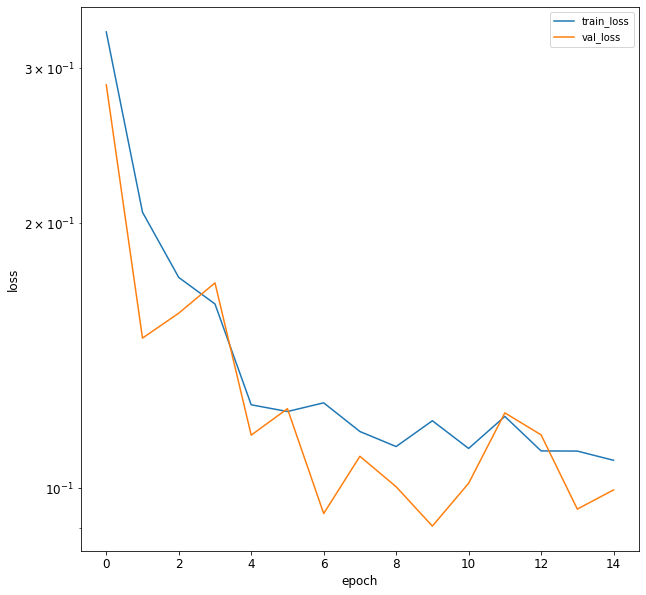

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5953][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5953,2786.0,27.382450,36.383026,1.0,4.0,1.0,2868.0,2892.0,2983.0,2792.0,2758.0,2848.0,2892.583333
5954,2785.0,26.927450,38.385703,1.0,4.0,1.0,2898.0,2904.0,2964.0,2667.0,2735.0,2844.0,2877.666667
5955,2724.0,26.472450,40.388380,1.0,4.0,1.0,2877.0,2931.0,2931.0,2576.0,2720.0,2825.0,2860.416667
5956,2748.0,26.472450,40.388380,2.0,4.0,1.0,2848.0,2896.0,2916.0,2544.0,2672.0,2796.0,2846.416667
5957,2772.0,26.472450,40.388380,2.0,4.0,1.0,2786.0,2868.0,2892.0,2514.0,2695.0,2806.0,2836.416667
5958,2753.0,26.582451,39.518725,2.0,4.0,1.0,2785.0,2898.0,2904.0,2555.0,2691.0,2786.0,2823.833333
5959,2732.0,26.692451,38.649070,2.0,4.0,1.0,2724.0,2877.0,2931.0,2583.0,2685.0,2690.0,2807.250000
5960,2699.0,26.692451,38.649070,3.0,4.0,1.0,2748.0,2848.0,2896.0,2582.0,2674.0,2727.0,2790.833333
5961,2698.0,26.692451,38.649070,3.0,4.0,1.0,2772.0,2786.0,2868.0,2574.0,2657.0,2743.0,2776.666667
5962,2690.0,25.732451,40.723802,3.0,4.0,1.0,2753.0,2785.0,2898.0,2590.0,2651.0,2748.0,2759.333333


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 5953 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2975 non-null   float64
 1   Temp    2975 non-null   float64
 2   Hum     2975 non-null   float64
 3   A       2975 non-null   float64
 4   B       2975 non-null   float64
 5   C       2975 non-null   float64
 6   D       2975 non-null   float64
 7   E       2975 non-null   float64
 8   F       2975 non-null   float64
 9   G       2975 non-null   float64
 10  H       2975 non-null   float64
 11  I       2975 non-null   float64
 12  J       2975 non-null   float64
dtypes: float64(13)
memory usage: 325.4 KB


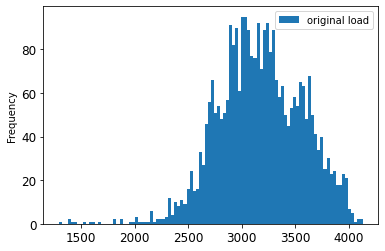

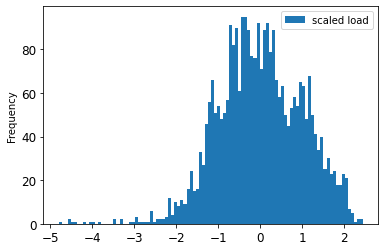

In [33]:
stlf_data[stlf_data.index >= 5953][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5953][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5953,-0.986115,-0.663087,-0.190662,-1.662375,-0.049884,0.639754,-0.774818,-0.711551,-0.475984,-0.907843,-0.966933,-0.649093,-0.735113,-0.988667
5954,-0.988667,-0.743627,-0.066164,-1.662375,-0.049884,0.639754,-0.698095,-0.680786,-0.524813,-1.237942,-1.030547,-0.660543,-0.774578,-1.144357
5955,-1.144357,-0.824167,0.058335,-1.662375,-0.049884,0.639754,-0.751801,-0.611566,-0.609620,-1.478254,-1.072034,-0.714929,-0.820215,-1.083102
5956,-1.083102,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.825966,-0.701296,-0.648169,-1.562760,-1.204793,-0.797938,-0.857255,-1.021847
5957,-1.021847,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.984527,-0.773080,-0.709847,-1.641984,-1.141179,-0.769314,-0.883711,-1.070340
5958,-1.070340,-0.804696,0.004272,-1.517869,-0.049884,0.639754,-0.987085,-0.696169,-0.679008,-1.533711,-1.152242,-0.826562,-0.917002,-1.123939
5959,-1.123939,-0.785225,-0.049791,-1.517869,-0.049884,0.639754,-1.143088,-0.750006,-0.609620,-1.459769,-1.168837,-1.101352,-0.960876,-1.208165
5960,-1.208165,-0.785225,-0.049791,-1.373364,-0.049884,0.639754,-1.081709,-0.824354,-0.699568,-1.462410,-1.199261,-0.995443,-1.004309,-1.210717
5961,-1.210717,-0.785225,-0.049791,-1.373364,-0.049884,0.639754,-1.020331,-0.983304,-0.771525,-1.483536,-1.246280,-0.949645,-1.041790,-1.231136
5962,-1.231136,-0.955156,0.079186,-1.373364,-0.049884,0.639754,-1.068922,-0.985867,-0.694428,-1.441283,-1.262875,-0.935333,-1.087648,-1.261763


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8923,2.012841,0.542359,-0.582125,1.516752,0.980703,0.639754,1.994879,1.900864,1.646772,2.173964,2.280132,2.170367,2.002708,2.005184
8924,2.005184,0.542359,-0.582125,1.661258,0.980703,0.639754,1.979534,1.970084,1.772698,2.203012,2.199923,1.978587,2.024755,1.849494
8925,1.849494,0.542359,-0.582125,1.661258,0.980703,0.639754,2.038355,1.975212,1.749569,2.163401,2.056101,1.944238,2.035338,1.910749
8926,1.910749,0.364914,-0.582125,1.661258,0.980703,0.639754,2.048585,1.962393,1.883205,2.007594,1.751861,1.741008,2.039747,1.770372
8927,1.770372,0.364914,-0.587468,1.661258,0.980703,0.639754,2.020453,2.003412,1.908904,1.791049,1.572084,1.700934,2.029826,1.770372


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5953,-0.988667
5954,-1.144357
5955,-1.083102
5956,-1.021847
5957,-1.070340
...,...
8923,2.005184
8924,1.849494
8925,1.910749
8926,1.770372


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5953,-0.986115,-0.663087,-0.190662,-1.662375,-0.049884,0.639754,-0.774818,-0.711551,-0.475984,-0.907843,-0.966933,-0.649093,-0.735113
5954,-0.988667,-0.743627,-0.066164,-1.662375,-0.049884,0.639754,-0.698095,-0.680786,-0.524813,-1.237942,-1.030547,-0.660543,-0.774578
5955,-1.144357,-0.824167,0.058335,-1.662375,-0.049884,0.639754,-0.751801,-0.611566,-0.609620,-1.478254,-1.072034,-0.714929,-0.820215
5956,-1.083102,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.825966,-0.701296,-0.648169,-1.562760,-1.204793,-0.797938,-0.857255
5957,-1.021847,-0.824167,0.058335,-1.517869,-0.049884,0.639754,-0.984527,-0.773080,-0.709847,-1.641984,-1.141179,-0.769314,-0.883711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,2.012841,0.542359,-0.582125,1.516752,0.980703,0.639754,1.994879,1.900864,1.646772,2.173964,2.280132,2.170367,2.002708
8924,2.005184,0.542359,-0.582125,1.661258,0.980703,0.639754,1.979534,1.970084,1.772698,2.203012,2.199923,1.978587,2.024755
8925,1.849494,0.542359,-0.582125,1.661258,0.980703,0.639754,2.038355,1.975212,1.749569,2.163401,2.056101,1.944238,2.035338
8926,1.910749,0.364914,-0.582125,1.661258,0.980703,0.639754,2.048585,1.962393,1.883205,2.007594,1.751861,1.741008,2.039747


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2975, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2975,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[-0.97454953],
       [-0.97866446],
       [-1.0973797 ],
       ...,
       [ 1.688295  ],
       [ 1.7222129 ],
       [ 1.6049731 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5953][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3172.362689
dtype: float64
Cons    391.868936
dtype: float64


In [42]:
load_mean=3172.362689
load_std=391.868936
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2975, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2975, 1)


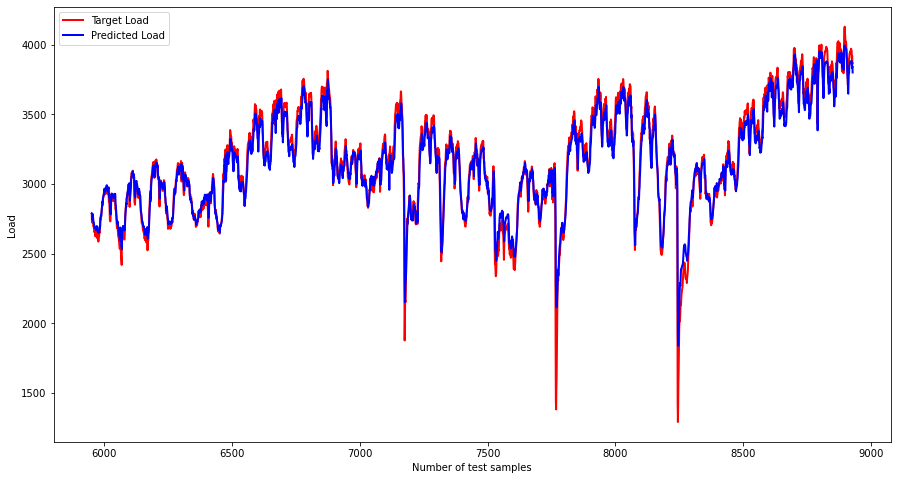

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.7476832147729617


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.271316
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5953  278393.289386
5954  272290.078872
5955  274693.069629
5956  277093.528946
5957  275191.800108
...             ...
8923  395715.150428
8924  389612.689155
8925  392014.808502
8926  386512.148879
8927  386513.337225

[2975 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5953    30.604802
5954  4215.887575
5955    31.303130
5956    51.724465
5957  1002.222731
...           ...
8923  5915.058468
8924   390.814769
8925  7599.084588
8926   356.151573
8927  4200.964728

[2975 rows x 1 columns]
y_t+1    5767.903109
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    75.946712
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2687):
    b=a[i]
    print(b)


[2790.467]
[2788.8545]
[2742.3337]
[2764.7407]
[2784.5874]
[2764.8494]
[2745.9658]
[2723.1667]
[2722.7607]
[2710.1387]
[2699.2798]
[2684.8464]
[2682.2422]
[2689.6895]
[2686.7563]
[2679.5627]
[2692.9531]
[2668.0347]
[2690.9841]
[2690.702]
[2698.58]
[2691.2893]
[2682.1191]
[2660.2622]
[2669.0647]
[2662.2021]
[2653.6538]
[2648.3313]
[2656.5015]
[2665.2505]
[2668.6592]
[2694.778]
[2685.941]
[2697.4336]
[2757.3381]
[2767.6177]
[2776.956]
[2770.0852]
[2791.0857]
[2815.8474]
[2837.0718]
[2859.7996]
[2874.3027]
[2866.0098]
[2900.9968]
[2906.4302]
[2919.606]
[2924.7512]
[2937.3237]
[2951.9988]
[2967.2932]
[2941.8457]
[2951.7927]
[2967.299]
[2967.9111]
[2964.5642]
[2961.8484]
[2984.007]
[2989.1218]
[2991.667]
[2972.2852]
[2970.711]
[2947.0544]
[2953.4727]
[2967.8662]
[2970.515]
[2976.7651]
[2937.137]
[2904.8857]
[2912.5078]
[2891.453]
[2839.232]
[2795.0095]
[2788.0867]
[2781.7673]
[2813.5376]
[2882.481]
[2904.6113]
[2932.2268]
[2914.314]
[2925.8213]
[2922.896]
[2914.6326]
[2921.481]
[2913.9832]


[3259.5474]
[3222.3784]
[3171.8357]
[3157.8284]
[3158.356]
[3155.8477]
[3157.8916]
[3122.13]
[3145.7788]
[3192.1294]
[3203.3254]
[3200.623]
[3215.6785]
[3244.157]
[3282.374]
[3290.683]
[3371.42]
[3401.8787]
[3403.2559]
[3427.3325]
[3464.4612]
[3458.1575]
[3483.5786]
[3489.414]
[3473.4612]
[3484.5132]
[3475.273]
[3484.4084]
[3474.045]
[3465.1309]
[3430.6953]
[3437.944]
[3457.9626]
[3479.6145]
[3560.2305]
[3539.4524]
[3548.135]
[3575.2998]
[3608.8137]
[3670.4187]
[3692.208]
[3677.9858]
[3640.8008]
[3670.6948]
[3704.3303]
[3681.8198]
[3684.6006]
[3650.8022]
[3614.752]
[3603.815]
[3583.5002]
[3580.8955]
[3594.1284]
[3571.1108]
[3534.1335]
[3467.501]
[3433.55]
[3390.6194]
[3341.1968]
[3354.8267]
[3437.3264]
[3471.8755]
[3513.5266]
[3454.5227]
[3509.9336]
[3563.5835]
[3581.3306]
[3588.783]
[3582.2786]
[3571.0613]
[3572.798]
[3588.0547]
[3563.483]
[3590.4702]
[3564.411]
[3501.4438]
[3403.914]
[3362.0562]
[3294.0637]
[3217.3823]
[3180.2222]
[3208.2705]
[3217.5273]
[3251.2937]
[3250.8145]
[3260

[3057.7847]
[3033.4592]
[2992.0107]
[3001.1667]
[3072.4658]
[3142.7122]
[3176.0093]
[3191.1138]
[3218.8057]
[3225.0032]
[3232.124]
[3246.9453]
[3242.6125]
[3241.7566]
[3238.0474]
[3258.4207]
[3264.7346]
[3243.7576]
[3261.2793]
[3224.3687]
[3156.5134]
[3161.5063]
[3095.5334]
[3078.5957]
[3045.124]
[3052.5469]
[3032.344]
[3023.592]
[3033.0515]
[3020.5889]
[3022.3914]
[3001.56]
[2966.7747]
[3006.9783]
[3018.6428]
[2962.546]
[2929.179]
[2941.528]
[2956.0571]
[2921.6157]
[2897.79]
[2870.643]
[2848.6692]
[2812.8906]
[2828.2158]
[2813.0798]
[2805.6072]
[2805.8716]
[2817.223]
[2821.4363]
[2835.1667]
[2840.1665]
[2883.6367]
[2897.2664]
[2860.2488]
[2964.0518]
[3021.3494]
[3061.064]
[3092.1487]
[3063.611]
[3031.7378]
[2949.5315]
[2763.2095]
[2625.2383]
[2523.8208]
[2522.545]
[2503.4697]
[2450.0635]
[2448.7354]
[2463.3452]
[2530.5388]
[2547.2322]
[2578.054]
[2625.4912]
[2656.8916]
[2622.9495]
[2608.3914]
[2620.039]
[2639.0093]
[2648.3994]
[2712.2822]
[2758.6638]
[2775.002]
[2787.398]
[2788.166]
[

[3226.9812]
[3204.3386]
[3204.8452]
[3194.9487]
[3214.4258]
[3207.5957]
[3189.1184]
[3119.0183]
[3086.819]
[3077.0051]
[3058.4253]
[2995.953]
[3042.8584]
[3110.8313]
[3092.804]
[3076.9648]
[2955.4736]
[2407.2002]
[1882.3761]
[1838.8364]
[1846.7253]
[1936.6626]
[2056.4744]
[2116.901]
[2171.4001]
[2229.7778]
[2289.5068]
[2268.0225]
[2271.079]
[2330.2195]
[2385.8608]
[2385.1396]
[2395.2788]
[2401.1763]
[2409.3745]
[2415.2637]
[2414.9092]
[2421.2583]
[2443.189]
[2475.739]
[2502.3232]
[2536.0125]
[2556.15]
[2554.5627]
[2565.1987]
[2567.1233]
[2560.888]
[2553.101]
[2518.9648]
[2502.6243]
[2494.08]
[2481.6343]
[2475.7207]
[2474.7212]
[2448.9243]
[2470.2969]
[2481.4712]
[2496.1807]
[2513.678]
[2558.063]
[2597.6736]
[2635.5276]
[2660.783]
[2709.7268]
[2772.625]
[2807.6443]
[2836.3767]
[2849.077]
[2872.2102]
[2871.851]
[2873.2317]
[2895.315]
[2921.404]
[2938.3445]
[2954.773]
[2922.1482]
[2902.1099]
[2922.7239]
[2952.3735]
[2984.778]
[3018.616]
[3045.8381]
[3047.013]
[3068.259]
[3087.894]
[3101.4